In [1]:
#alary_hike -> Build a prediction model for Salary_hike
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

salary=pd.read_csv("Salary_Data.csv")

In [2]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA & Data Visualization

In [3]:
salary.shape

(30, 2)

In [4]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\dalwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

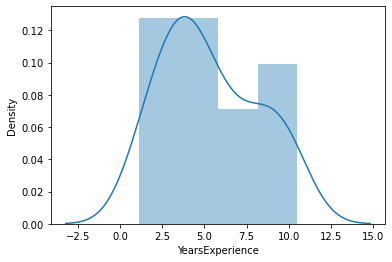

In [6]:
import seaborn as sns
sns.distplot(salary['YearsExperience'])

C:\Users\dalwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

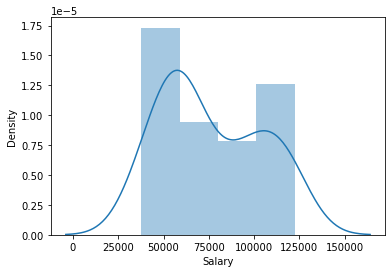

In [7]:
import seaborn as sns
sns.distplot(salary['Salary'])

# Correlation Analysis

In [8]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

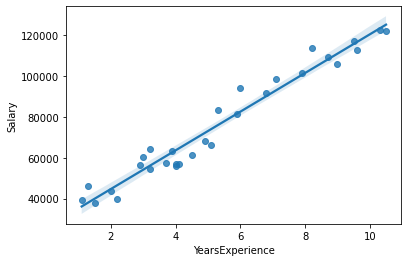

In [9]:
sns.regplot(x="YearsExperience",y="Salary",data=salary)

# Model Building

In [10]:
newdata=pd.Series([11,11.5,12,12.5,13,13.5])

In [11]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [12]:
data_pred

,YearsExperience
0,11.0
1,11.5
2,12.0
3,12.5
4,13.0
5,13.5


In [13]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=salary).fit()
model

# Model Predictions

In [14]:
model.predict(data_pred)

0    129741.785735
1    134466.766895
2    139191.748056
3    143916.729217
4    148641.710378
5    153366.691538
dtype: float64

In [15]:
model.predict(salary)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        17:08:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
pred=model.predict(salary.iloc[:,0])
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [18]:
model.resid 
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [19]:
RMSE=np.sqrt(np.mean((np.array(salary['YearsExperience'])-np.array(pred))**2))
RMSE

80440.84508275456

Text(0, 0.5, 'Salary')

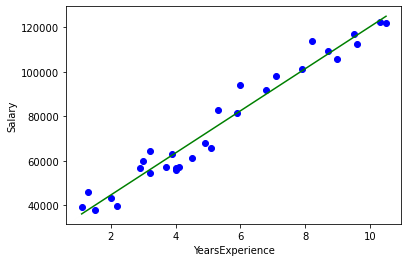

In [20]:
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'],color='blue')
plt.plot(salary['YearsExperience'],pred,color='green')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [21]:
df_new=pd.DataFrame({"YearsExperience":10},index=[1])

In [22]:
model.predict(df_new)

1    120291.823413
dtype: float64

## Delivery_time -> Predict delivery time using sorting time

In [23]:
time=pd.read_csv("delivery_time.csv")

In [24]:
time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA & Data Visualization

In [25]:
time.shape

(21, 2)

In [26]:
time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [27]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\dalwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

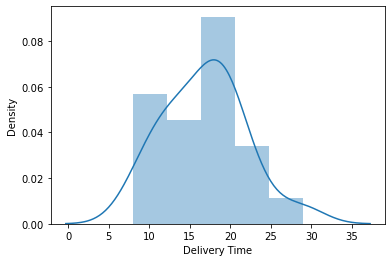

In [28]:
sns.distplot(time['Delivery Time'])

C:\Users\dalwe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

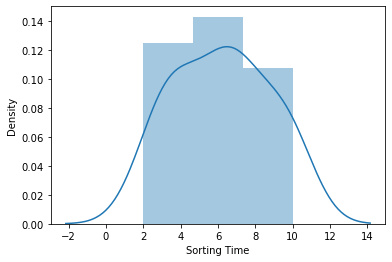

In [29]:
sns.distplot(time['Sorting Time'])

# Correlation Analysis

In [30]:
time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [31]:
time=time.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [32]:
time

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [33]:
import statsmodels.formula.api as smf

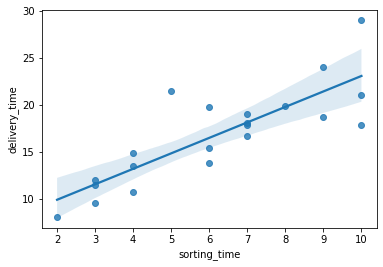

In [34]:
sns.regplot(x=time['sorting_time'],y=time['delivery_time'],data=time)
model1=smf.ols("delivery_time~sorting_time",data=time).fit()
model1

# Model Building

In [35]:
newdata1=pd.Series([12,13,14,15,16,17])

In [36]:
data_pred1=pd.DataFrame(newdata1,columns=['sorting_time'])

In [37]:
data_pred1

,sorting_time
0,12
1,13
2,14
3,15
4,16
5,17


# Model Predictions

In [38]:
model1.predict(data_pred1)

0    26.370973
1    28.019993
2    29.669013
3    31.318032
4    32.967052
5    34.616072
dtype: float64

In [39]:
model1.predict(time)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [40]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           3.98e-06
Time:                        17:08:40   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
pred=model1.predict(time)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [42]:
model1.resid
model1.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [43]:
RMSE=np.sqrt(np.mean((np.array(time['sorting_time'])-np.array(pred))**2))
RMSE

10.722052392104557

In [44]:
model1=smf.ols("delivery_time~np.log(sorting_time)",data=time).fit()

In [45]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           2.64e-06
Time:                        17:08:40   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
RMSE_log=np.sqrt(np.mean((np.array(time['sorting_time'])-np.array(pred))**2))
RMSE_log

10.722052392104557

In [47]:
model2=smf.ols("np.log(delivery_time)~sorting_time",data=time).fit()

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 09 Jun 2022   Prob (F-statistic):           1.59e-06
Time:                           17:08:40   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
RMSE_log=np.sqrt(np.mean((np.array(time['sorting_time'])-np.array(pred))**2))
RMSE_log

10.722052392104557

In [50]:
model3=smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=time).fit()

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 09 Jun 2022   Prob (F-statistic):           1.60e-07
Time:                           17:08:40   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
actual=time.delivery_time
pred=model3.predict(time)
residual=actual-pred

In [53]:
pred

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [54]:
Newdata=pd.DataFrame({"sorting_time":10.00},index=[1])

In [55]:
model3.predict(Newdata)

1    3.117833
dtype: float64

In [56]:
#Model Deletion Diagnostics
#Detecting Influencers/Outliers
#Cook's Distance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [57]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [58]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(23, 0.131754523131353)

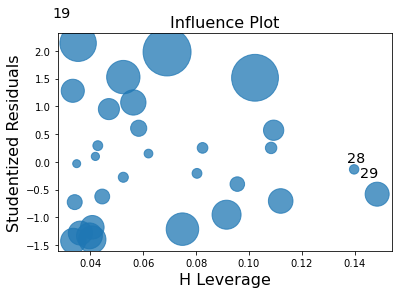

In [59]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [60]:
k = time.shape[1]
n = time.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [61]:
time[time.index.isin([7,18])]

,delivery_time,sorting_time
7,9.5,3
18,8.0,2


In [62]:
#See the differences in HP and other variable values
time.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [63]:
# Improving the model

In [64]:
#Load the data
time_new=pd.read_csv("delivery_time.csv")

In [65]:
#Discard the data points which are influencers and reasign the row number (reset_index())
time1=time_new.drop(time_new.index[[7,18]],axis=0).reset_index()

In [66]:
#Drop the original index
time1=time1.drop(['index'],axis=1)

In [67]:
time1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,17.90,10
8,18.75,9
9,19.83,8


In [68]:
time1=time1.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

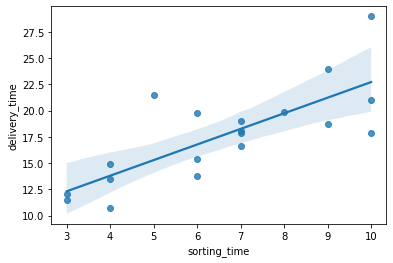

In [69]:
import statsmodels.formula.api as smf

sns.regplot(x=time1['sorting_time'],y=time1['delivery_time'],data=time1)
model4=smf.ols("delivery_time~sorting_time",data=time1).fit()
model4

In [70]:
newdata2=pd.Series([12,13,14,15])

In [71]:
data_pred2=pd.DataFrame(newdata2,columns=['sorting_time'])

In [72]:
data_pred2

,sorting_time
0,12
1,13
2,14
3,15


In [73]:
model4.predict(time1)

0     22.728074
1     13.799760
2     16.775864
3     21.240021
4     22.728074
5     16.775864
6     18.263917
7     22.728074
8     21.240021
9     19.751969
10    13.799760
11    18.263917
12    12.311708
13    12.311708
14    13.799760
15    16.775864
16    18.263917
17    18.263917
18    15.287812
dtype: float64